In [11]:
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
import sklearn.metrics as skm
import pandas as pd
import numpy as np

data_train = pd.read_csv("../preprocessing/preprocesed_variables_train.csv")
important_variables = pd.read_csv("../preprocessing/important.csv")

X = data_train.drop(columns=['health'])
#X = X[important_variables['0']]
y = data_train['health']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=20712124, stratify = y)

[(1, 4376), (2, 4224), (3, 4447), (4, 4348), (5, 4304)]


<AxesSubplot:>

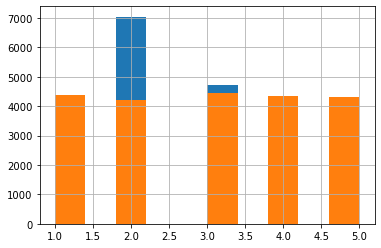

In [14]:
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import ClusterCentroids
from collections import Counter

# y.hist()
# X_resampled, y_resampled = ADASYN().fit_resample(X_train, y_train)
# print(sorted(Counter(y_resampled).items()))
# y_resampled.hist()

# cc = ClusterCentroids(random_state=0)
# X_resampled, y_resampled = cc.fit_resample(X_train, y_train)
# print(sorted(Counter(y_resampled).items()))
# y_resampled.hist()

In [5]:
y - 1

0        1
1        2
2        4
3        2
4        2
        ..
17393    1
17394    3
17395    2
17396    0
17397    0
Name: health, Length: 17398, dtype: int64

In [15]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

model = xgb.XGBClassifier(
    use_label_encoder=False,
    objective="multi:softprob",
    num_class = 5,
    **{'colsample_bytree': 0.7201663275432886, 'gamma': 0.4174981803004834, 'learning_rate': 0.0811519922347911, 'max_depth': 4, 'n_estimators': 112, 'subsample': 0.6466086108209839})


# data = xgb.DMatrix(data=X_resampled, label=(y_resampled-1))

# param = {'max_depth':2, 'eta':1, 'objective':'multi:softprob', 'tree_method': 'gpu_hist'}

# num_round = 2
# bst = xgb.XGBModel(param, data, num_round, verbose_eval = True)

# #use gridsearch to test all values for n_neighbors
# model = GridSearchCV(bst, random_grid, cv = 3, verbose = 2, scoring = "neg_log_loss")

model = model.fit(X_resampled, y_resampled - 1)


#model.best_params_, model.best_score_

[09:59:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [16]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

skm.log_loss(y_test - 1, y_pred_proba), skm.accuracy_score(y_test - 1, y_pred)

(1.2210724172342955, 0.45057471264367815)

In [14]:
y_pred = pd.DataFrame(model.predict(X_test))
y_pred.to_csv("temp.csv", index = False)

In [38]:
data_test = pd.read_csv("../preprocessing/preprocesed_variables_test.csv")
og_test = pd.read_csv("../../data/test.csv")
unique_ids = og_test['uniqueid']

data_test = data_test.drop(columns='health')
data_test = data_test[important_variables['0']]

test_pred_proba = model.predict_proba(data_test)
test_pred = pd.DataFrame({'p':model.predict(data_test)})

test_pred.to_csv("temp.csv", index = False)
preds = pd.DataFrame(test_pred_proba, columns=['p1','p2','p3','p4','p5'])
preds.insert(0, 'uniqueid', unique_ids)

preds.to_csv("xgb_pred.csv", index = False)